# Basic Data Processing with Pandas - Part 1

**What is Pandas for?**

This tool is essentially your data’s home. Through Pandas, you get acquainted with your data by cleaning, transforming, and analyzing it.

For example, Pandas can extract the data from  CSV file into a DataFrame — a table, basically — then lets you do things like:

- Calculate statistics and answer questions about the data, like:
    - What's the average, median, max, or min of each column?
    - Does column A correlate with column B?
    - What does the distribution of data in column C look like?
    
    
- Clean the data by doing things like removing missing values and filtering rows or columns by some criteria

- Visualize the data with help from Matplotlib. Plot bars, lines, histograms, bubbles, and more.

- Store the cleaned, transformed data back into a CSV, other file or database

In this tutorial, we will work with a dataset with information about movies from IMDB. We will use Pandas to answer questions such as:
- What are the average ratings of movies by year?
- What genres are the most highly rated?
- What directors bring the most revenue to the studio?

# Getting Started

Pandas is a not a built-in Python library, so we need to install it first. We will use the `pip` package manager to install Pandas. If you are using Colab, Pandas is already installed. If you are using your own computer, you can install Pandas by running the following command:

``` !pip install pandas ```

The ! tells the notebook to run the following command in the terminal. `pip` is the package manager that comes with Python. Usually, you can install a package by running `pip install <package_name>`.

To import pandas, we use the following command:

```import pandas as pd ```

The `pd` is a common alias for pandas. It is used to save typing and to distinguish pandas from other libraries that are also imported into the notebook.

In [89]:
%pip install pandas
import pandas as pd

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\chadi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## Basic Definitions

The primary two components of pandas are **Series** and **DataFrame**.

### Series

A `Series` is essentially a column, and a `DataFrame` is a multi-dimensional table made up of a collection of `Series`:

`class pandas.Series(data=None, index=None...)`

**data:** Contains data stored in Series.\
**index:** With the `index` argument, you can name your own labels.



In [90]:
import pandas as pd

data = [2, 4, 5, 6, 9]

series = pd.Series(data, index=[1, 3, 5, 7, 9])

print(series)

1    2
3    4
5    5
7    6
9    9
dtype: int64


In [91]:
series[1]

2

The `index` is like the row labels of a spreadsheet. It is a list of values that uniquely identify each row. If you don't specify an index, one will be created for you from the data. Any list of values can be used as an index, but it is usually either integers or strings.

In [92]:
menu = pd.Series([8.5, 3.0, 10.0], index=["salad", "soup", "pizza"])
print(menu)
print(menu["soup"])

salad     8.5
soup      3.0
pizza    10.0
dtype: float64
3.0


### DataFrame

A `DataFrame` is a table. It contains an array of individual entries, each of which has a certain value. Each entry corresponds with a row (or record) and a column.


Let's consider we have a fruit stand that sells apples and oranges. We want to have a column for each fruit and a row for each customer purchase. To organize this as a dictionary for pandas we could do something like:

In [93]:
data = {
    "apples": [3, 2, 0, 1], 
    "oranges": [0, 3, 7, 2]
}

print(data)

{'apples': [3, 2, 0, 1], 'oranges': [0, 3, 7, 2]}


Now converting to a `DataFrame`:

In [94]:
purchases = pd.DataFrame(data)

print(purchases)

   apples  oranges
0       3        0
1       2        3
2       0        7
3       1        2


**How did that work?**

Each (key, value) item in data corresponds to a column in the resulting DataFrame.

`class pandas.DataFrame(data=None, index=None, columns=None, dtype=None...)`

**data:** Data can be ndarray (structured or homogeneous), Iterable, dict, or DataFrame.

**index:** Index to use for resulting frame.

**columns:** Column labels to use for resulting frame when data does not have them. If data contains column labels, will perform column selection instead.

**dtype:** Data type to force. Only a single dtype is allowed.

Let's have customer names as our index:

In [95]:
purchases = pd.DataFrame(data, index=["June", "Robert", "Lily", "David"])

print(purchases)

        apples  oranges
June         3        0
Robert       2        3
Lily         0        7
David        1        2


So now we could locate a customer's order by using their name:



In [96]:
purchases.loc["June"]

apples     3
oranges    0
Name: June, dtype: int64

In [97]:
purchases.iloc[-1]

apples     1
oranges    2
Name: David, dtype: int64

### Task: Create a Dataframe with 3 columns and 3 rows. The columns should be named `Name`, `Age`, and `Favorite Color`. Fill in the rows with any data you like. The `Name` column should be the index.



In [98]:
data = {
    "Age": [1, 2, 3, 4],
    "Favorite Color": ["black", "white", "blue", "red"]
}
df = pd.DataFrame(data, index=["June", "Robert", "Lily", "David"])
df.index = df.index.rename("name")
display(df)

,Age,Favorite Color
name,,
June,1,black
Robert,2,white
Lily,3,blue
David,4,red


In [99]:
data = {
    "Name":["June", "Robert", "Lily", "David"],
    "Age": [1, 2, 3, 4],
    "Favorite Color": ["black", "white", "blue", "red"]
}
df = pd.DataFrame(data).set_index("Name")
display(df)


,Age,Favorite Color
Name,,
June,1,black
Robert,2,white
Lily,3,blue
David,4,red


# Loading DataFrames

Often, you won't be creating DataFrames from scratch. Instead, you will be loading them from files. Pandas can read a variety of file types using its `pd.read_` functions. CSV files are one of the most common, so we will start there.

## Uploading Data

Let's first download and import the dataset we will be working with. First, download the file `IMDB-Movie-Data.csv` from Canvas. 

Then, upload it to your Colab notebook by clicking on the folder icon on the left side of the screen. Click on the `Upload` button and select the file. You should see the file in the file explorer on the left side of the screen. If you right click on the file, you can copy its path by clicking on `Copy Path`.

You can also sync your Google Drive with Colab. To do this, click on the folder icon on the left side of the screen. Click on the `Mount Drive` button. You will be prompted to authenticate your Google account. Once you do that, you will be able to access your Google Drive files from Colab. You can upload the file to your Google Drive and then access it from Colab.

If you are using a local Jupyter notebook, you can just save the file in the same directory as your notebook.

## Loading CSV Files

CSV stands for "comma-separated values". CSV files are a common way to store tabular data. They are plain text files with a specific structure. Each line of the file is a data record. Each record consists of one or more fields, separated by commas. The first line of the file usually contains the names of each column.

With CSV files, all you need is a single line of code:
`pandas.read_csv(filepath)`

There are many other arguments you can pass to `read_csv`, but we will only use the `filepath` for now.

Use the help function to learn more about `read_csv`:

```help(pd.read_csv)``` or ```pd.read_csv?```

In [100]:
#The default value is index_col=None 
movies_df = pd.read_csv("IMDB-Movie-Data.csv")

#If we set index_col=0, we're explicitly stating to treat the first column as the index:
movies_df = pd.read_csv("IMDB-Movie-Data.csv", index_col=0)

movies_df

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...
996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


## Exporting CSV Files

You can export a DataFrame to a CSV file using the `DataFrame.to_csv` method. The method has the following signature:

`DataFrame.to_csv(path_or_buf=None, sep=',', columns=None, header=True...)`

Use the help function to learn more about `to_csv`:

```help(pd.DataFrame.to_csv)``` or ```pd.DataFrame.to_csv?```

In [101]:
movies_df.to_csv("new_file.csv")

# Exploring your DataFrame

Now let's learn some ways to explore your DataFrame. First, let's see some methods for checking the data within the DataFrame.

## Accessing Data

`DataFrame.head(n)` returns the first n rows of the DataFrame.

In [102]:
movies_df.head(5)

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


`DataFrame.tail(n)` returns the last n rows of the DataFrame.

In [103]:
movies_df.tail(5)

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


`DataFrame.sample(n)` returns a random sample of n rows from the DataFrame.

You can also use `DataFrame.sample(nfrac)` to return a random sample of nfrac fraction (a percentage) of rows from the DataFrame.

In [104]:
# Run this cell a few times to see different samples
movies_df.sample(5)
# Now sample 5% of the DataFrame

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
911,Il racconto dei racconti - Tale of Tales,"Drama,Fantasy,Horror",From the bitter quest of the Queen of Longtrel...,Matteo Garrone,"Salma Hayek, Vincent Cassel, Toby Jones, John ...",2015,133,6.4,17565,0.08,72.0
580,All Good Things,"Crime,Drama,Mystery",Mr. David Marks was suspected but never tried ...,Andrew Jarecki,"Ryan Gosling, Kirsten Dunst, Frank Langella, L...",2010,101,6.3,44158,0.58,57.0
159,Scott Pilgrim vs. the World,"Action,Comedy,Fantasy",Scott Pilgrim must defeat his new girlfriend's...,Edgar Wright,"Michael Cera, Mary Elizabeth Winstead, Kieran ...",2010,112,7.5,291457,31.49,69.0
60,Sully,"Biography,Drama","The story of Chesley Sullenberger, an American...",Clint Eastwood,"Tom Hanks, Aaron Eckhart, Laura Linney, Valeri...",2016,96,7.5,137608,125.07,74.0
90,The Accountant,"Action,Crime,Drama",As a math savant uncooks the books for a new c...,Gavin O'Connor,"Ben Affleck, Anna Kendrick, J.K. Simmons, Jon ...",2016,128,7.4,162122,86.20,51.0


### Accessing Columns

You can access a specific column by using the following syntax:

In [105]:
movies_df[["Title","Rating"]]



,Title,Rating
Rank,,
1,Guardians of the Galaxy,8.1
2,Prometheus,7.0
3,Split,7.3
4,Sing,7.2
5,Suicide Squad,6.2
...,...,...
996,Secret in Their Eyes,6.2
997,Hostel: Part II,5.5
998,Step Up 2: The Streets,6.2


The square brackets + string with column anme syntax works for any column name.

The `.` notation only works if the column name is a valid Python variable name. For instance, `df.Movie Title` will not work, but `df.movie_title` will. 

To make sure your code always works, you can use the square brackets + string syntax.

### Accessing Rows

You can access a specific row in two ways:

- `df.loc` - locates by index name (row label). In our case, the index is the ranking of the movie.
- `df.iloc` - locates by numerical index (row number).

Note that `df.loc` and `df.iloc` are not methods, but attributes. This means that you don't use parentheses to call them. You just use them like this: `df.loc[1]` or `df.iloc[1]`.

The arguments for `df.loc` can also be a list of indices. For example, `df.loc[[1, 2, 3]]` will return the top three ranked movies.

Remember that DataFrame indices can also be strings.

In [106]:
# Returns the movie with Rank 1
print(movies_df.loc[1])
# Returns the movie in the first row
print(movies_df.iloc[0])

Title                                           Guardians of the Galaxy
Genre                                           Action,Adventure,Sci-Fi
Description           A group of intergalactic criminals are forced ...
Director                                                     James Gunn
Actors                Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...
Year                                                               2014
Runtime (Minutes)                                                   121
Rating                                                              8.1
Votes                                                            757074
Revenue (Millions)                                               333.13
Metascore                                                          76.0
Name: 1, dtype: object
Title                                           Guardians of the Galaxy
Genre                                           Action,Adventure,Sci-Fi
Description           A group of intergal

`df.loc` and `df.iloc` also work for accessing columns. For example, `df.loc[1, 'Title']` will return the title of the movie with index 1.

You can access all rows for a specific column by using `:` as the first argument. For example, `df.loc[:, 'Title']` will return all the titles.

### Task: trying out accessing methods

- Change the index of your DataFrame to the column `Title`. Then, use `df.loc` to find out the rating of the movie `The Dark Knight Rises`.
- Does slicing work with DataFrames? Try to access rows 10 to 20 using slicing.
- Does slicing work with indices that are strings? Try to slice the `Title` index.
- Use slicing to access all rows for the columns `Title` and `Rating`.
- Use slicing to access all rows in reverse order.

In [107]:
# Code here

## Conditional Selection

Pandas makes it easy to select rows based on a condition. For example, if we want to select all the movies with a rating of 8.5 or higher, we can do the following:

In [108]:
movies_df[movies_df["Rating"] >= 8.5]

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
65,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
97,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,79.0
100,The Departed,"Crime,Drama,Thriller",An undercover cop and a mole in the police att...,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,8.5,937414,132.37,85.0
118,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,NaN
125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
134,Whiplash,"Drama,Music",A promising young drummer enrolls at a cut-thr...,Damien Chazelle,"Miles Teller, J.K. Simmons, Melissa Benoist, P...",2014,107,8.5,477276,13.09,88.0


You can combine multiple conditions using the operators `&` (and) and `|` (or). For example, if we want to select all the movies with a rating of 8.5 that came out after 2009, we can do the following:

In [109]:
movies_df[(movies_df["Rating"] >= 8.5) & (movies_df["Year"] >= 2010)]

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
97,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,79.0
118,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,NaN
125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
134,Whiplash,"Drama,Music",A promising young drummer enrolls at a cut-thr...,Damien Chazelle,"Miles Teller, J.K. Simmons, Melissa Benoist, P...",2014,107,8.5,477276,13.09,88.0
250,The Intouchables,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,13.18,57.0


In Pandas, to negate a condition, you use the `~` operator. For example, if we want to select all the movies with a rating of 8.5 or lower, we can do the following:

In [110]:
movies_df[~(movies_df["Rating"] > 8.5)]

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...
996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


### Task: conditional selection

- Select all movies by director David Yates with a Metascore of 70 or higher.
- Check how many movies have both a rating of 8.5 or higher and a Metascore of 70 or higher.
- Check how many movies not directed by Ridley Scott were released after 2015 or before 2010.

In [120]:
display(movies_df.query("Director == 'David Yates' and Metascore >= 70"))
len(movies_df.query("Rating >= 8.5 and Metascore >= 70"))
len(movies_df.query("Director != 'Ridley Scott' and (Year>2015 or Year<2010)"))


,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
115,Harry Potter and the Deathly Hallows: Part 2,"Adventure,Drama,Fantasy","Harry, Ron and Hermione search for Voldemort's...",David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, M...",2011,130,8.1,590595,380.96,87.0
315,Harry Potter and the Order of the Phoenix,"Adventure,Family,Fantasy",With their warning about Lord Voldemort's retu...,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, B...",2007,138,7.5,385325,292.00,71.0
474,Harry Potter and the Half-Blood Prince,"Adventure,Family,Fantasy",As Harry Potter begins his sixth year at Hogwa...,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, M...",2009,153,7.5,351059,301.96,78.0


494

### Querying

You can also use the `DataFrame.query` method to select rows based on conditions. For example, if we want to select all the movies with a rating of 8.5 or higher that were released after 2010, we can do the following:

In [140]:
movies_df.query("Director == 'Steven Spielberg'")

TypeError: Could not convert ['The BFGLincolnBridge of SpiesIndiana Jones and the Kingdom of the Crystal Skull'
 'Adventure,Family,FantasyBiography,Drama,HistoryDrama,History,ThrillerAction,Adventure,Fantasy'
 'An orphan little girl befriends a benevolent giant who takes her to Giant Country, where they attempt to stop the man-eating giants that are invading the human world.As the War continues to rage, America\'s president struggles with continuing carnage on the battlefield as he fights with many inside his own cabinet on the decision to emancipate the slaves.During the Cold War, an American lawyer is recruited to defend an arrested Soviet spy in court, and then help the CIA facilitate an exchange of the spy for the Soviet captured American U2 spy plane pilot, Francis Gary Powers.Famed archaeologist/adventurer Dr. Henry "Indiana" Jones is called back into action when he becomes entangled in a Soviet plot to uncover the secret behind mysterious artifacts known as the Crystal Skulls.'
 'Steven SpielbergSteven SpielbergSteven SpielbergSteven Spielberg'
 'Mark Rylance, Ruby Barnhill, Penelope Wilton,Jemaine ClementDaniel Day-Lewis, Sally Field, David Strathairn,Joseph Gordon-LevittTom Hanks, Mark Rylance, Alan Alda, Amy RyanHarrison Ford, Cate Blanchett, Shia LaBeouf,Karen Allen'] to numeric

In [56]:
movies_df.query("Rating >= 8.5 and Year > 2010")

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
97,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,79.0
118,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,NaN
125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
134,Whiplash,"Drama,Music",A promising young drummer enrolls at a cut-thr...,Damien Chazelle,"Miles Teller, J.K. Simmons, Melissa Benoist, P...",2014,107,8.5,477276,13.09,88.0
250,The Intouchables,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,13.18,57.0


Both methods work the same way. The only difference is that `DataFrame.query` is more convenient to use when you have a lot of conditions because the syntax is more compact.

You can find a nice list of examples of query examples [here](https://sparkbyexamples.com/pandas/pandas-dataframe-query-examples/).

**Task:**  Use querying to check how many movies not directed by Ridley Scott were released after 2015 or before 2010.

In [ ]:
# Code here

## Basic Statistics

Pandas makes it easy to calculate basic statistics for your DataFrame. Let's start by calculating a descriptive overview of the numerical columns in our DataFrame.

We can do that by using the `DataFrame.describe` method. This method returns a DataFrame with the following statistics:

In [127]:
movies_df["Rating"].describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: Rating, dtype: float64

We can also calculate the mean, median, and standard deviation of a column using the `DataFrame.mean`, `DataFrame.median`, and `DataFrame.std` methods.

### Task: basic statistics
- Compare the mean, median, and standard deviation of the `Metascore` and `Rating` columns.
- Calculate the mean revenue of movies directed by Christopher Nolan.
- Compare the average runtime of Comedy and Horror movies.

## Aggregation

So far, we have been calculating statistics for a single column. But what if we want to calculate statistics for multiple columns? For that, we can use aggregation methods.

In this tutorial, we will learn about the `DataFrame.groupby` method. This method allows us to group rows based on a column and then calculate statistics for each group.

For example, if we want to calculate the average rating for each director, we can do the following:

In [128]:
movies_df.groupby("Director")["Rating"].mean()

Director
Aamir Khan             8.50
Abdellatif Kechiche    7.80
Adam Leon              6.50
Adam McKay             7.00
Adam Shankman          6.30
                       ... 
Xavier Dolan           7.55
Yimou Zhang            6.10
Yorgos Lanthimos       7.20
Zack Snyder            7.04
Zackary Adler          5.10
Name: Rating, Length: 644, dtype: float64

We can analyse multiple columns at the same time by passing a list of column names to `DataFrame.groupby`. For example, if we want to calculate the average rating and Metascore for each director, we can do the following:

In [129]:
movies_df.groupby("Director")[["Rating", "Metascore"]].mean()

,Rating,Metascore
Director,,
Aamir Khan,8.50,42.0
Abdellatif Kechiche,7.80,88.0
Adam Leon,6.50,77.0
Adam McKay,7.00,65.5
Adam Shankman,6.30,64.0
...,...,...
Xavier Dolan,7.55,61.0
Yimou Zhang,6.10,42.0
Yorgos Lanthimos,7.20,77.5


In [130]:
movies_df.groupby("Director").nunique()

,Title,Genre,Description,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Director,,,,,,,,,,
Aamir Khan,1,1,1,1,1,1,1,1,1,1
Abdellatif Kechiche,1,1,1,1,1,1,1,1,1,1
Adam Leon,1,1,1,1,1,1,1,1,0,1
Adam McKay,4,4,4,4,4,4,4,4,4,4
Adam Shankman,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...
Xavier Dolan,2,1,2,2,2,2,2,2,1,2
Yimou Zhang,1,1,1,1,1,1,1,1,1,1
Yorgos Lanthimos,2,2,2,2,2,2,2,2,2,2


There are many other aggregation methods that you can use with `DataFrame.groupby`. You can find a list of them [here](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html).

We will learn more about aggregation methods in other tutorials.


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\chadi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------------------------- 7.6/7.6 MB 12.5 MB/s eta 0:00:00
     -------------------------------------- 163.0/163.0 kB 9.5 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 21.3 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 12.3 MB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 5.5 MB/s eta 0:00:00


<Axes: xlabel='Year'>

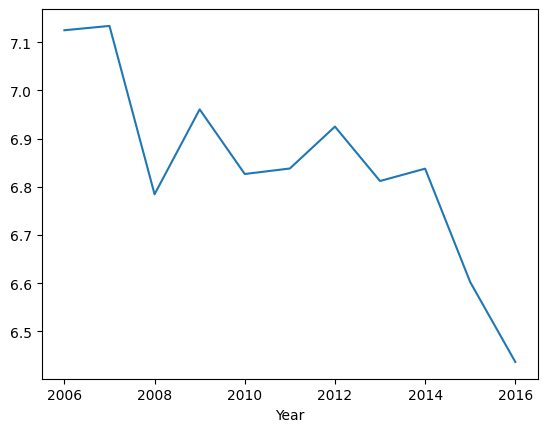

In [137]:
install matplotlib
movies_df.groupby("Year")["Rating"].mean().plot()

## Sorting

To sort our DataFrame (or a subset of it) by a column, we can use the `DataFrame.sort_values` method. For instance, to sort movies by rating in descending order, we can do the following:

In [138]:
movies_df.sort_values("Rating", ascending=False)

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
118,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,NaN
37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
97,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,79.0
...,...,...,...,...,...,...,...,...,...,...,...
969,Wrecker,"Action,Horror,Thriller",Best friends Emily and Lesley go on a road tri...,Micheal Bafaro,"Anna Hutchison, Andrea Whitburn, Jennifer Koen...",2015,83,3.5,1210,NaN,37.0
648,Tall Men,"Fantasy,Horror,Thriller",A challenged man is stalked by tall phantoms i...,Jonathan Holbrook,"Dan Crisafulli, Kay Whitney, Richard Garcia, P...",2016,133,3.2,173,NaN,57.0
872,Dragonball Evolution,"Action,Adventure,Fantasy",The young warrior Son Goku sets out on a quest...,James Wong,"Justin Chatwin, James Marsters, Yun-Fat Chow, ...",2009,85,2.7,59512,9.35,45.0


# Putting it all together

Now we have learned all the concepts we need to answer our original questions about the data. Go ahead and implement them!

- What are the average ratings of movies by year?
- What genres are the most highly rated?
- What directors bring the most revenue to the studio?

**Bonus tasks**:
- Create a DataFrame with the 10 best rated and the 10 worst rated movies. Save it as a CSV file.
- Select all movies directed by the top 3 highest rated (by Metascore) directors.
- Find how many unique directors are there in the dataset.
- Find out the number of movies released by year in the dataset.

In [144]:
movies_df.query("Director == 'Steven Spielberg'")["Rating"].median()

6.9

In [145]:
movies_df.groupby("Year")["Rating"].mean()

Year
2006    7.125000
2007    7.133962
2008    6.784615
2009    6.960784
2010    6.826667
2011    6.838095
2012    6.925000
2013    6.812088
2014    6.837755
2015    6.602362
2016    6.436700
Name: Rating, dtype: float64

In [163]:
movies_df.groupby("Genre")["Rating"].mean().sort_values(ascending=False)

Genre
Animation,Drama,Fantasy    8.60
Drama,Family,Music         8.50
Drama,Western              8.40
Animation,Drama,Romance    8.40
Adventure,Drama,Sci-Fi     8.30
                           ... 
Action,Fantasy,Thriller    5.20
Sci-Fi,Thriller            5.00
Sci-Fi                     4.95
Comedy,Western             4.80
Fantasy,Horror,Thriller    3.20
Name: Rating, Length: 207, dtype: float64

In [167]:
movies_df.groupby("Director")["Revenue (Millions)"].mean().sort_values(ascending=False)

Director
James Cameron      760.510
Colin Trevorrow    652.180
Joss Whedon        541.135
Lee Unkrich        414.980
Gary Ross          408.000
                    ...   
Todor Chapkanov        NaN
Tyler Shields          NaN
Walter Hill            NaN
Will Slocombe          NaN
William Oldroyd        NaN
Name: Revenue (Millions), Length: 644, dtype: float64

In [175]:
movies_df.sort_values("Rating", ascending=False)[:10]

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
81,Inception,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0
118,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,NaN
37,Interstellar,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
97,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,79.0
250,The Intouchables,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,13.18,57.0
134,Whiplash,"Drama,Music",A promising young drummer enrolls at a cut-thr...,Damien Chazelle,"Miles Teller, J.K. Simmons, Melissa Benoist, P...",2014,107,8.5,477276,13.09,88.0
65,The Prestige,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
100,The Departed,"Crime,Drama,Thriller",An undercover cop and a mole in the police att...,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,8.5,937414,132.37,85.0
